## Prediction Intervals for the CIL
Author: Clara Hoffmann

In [1]:
# load packages
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
from helpers import confidence_intervals
from helpers import (Fy, find_closest_element, confidence_intervals)

import multiprocessing
from scipy import integrate

In [2]:
# load cdf for each validation observation
va_horse = np.load('../../../../data/commaai/calibration/cil_dens/va_horse_cdf_is.npy')
#hmc_horse = np.load('../../../../data/commaai/calibration/cil_dens/hmc_horse_cdf_is.npy')
va_ridge = np.load('../../../../data/commaai/calibration/cil_dens/va_ridge_cdf_is.npy')
#hmc_ridge = np.load('../../../../data/commaai/calibration/cil_dens/hmc_ridge_cdf_is.npy')
mc_dens = np.load('../../../../data/commaai/predictions/mc_dropout/cdf_mc_dropout_cil_is.npy')
cdf_mdn = np.load('../../../../data/commaai/predictions/cdf_is_mdn_cil.npy')

In [3]:
true_y = np.load('../../../../data/commaai/extracted_coefficients/copula_cil/Bzeta/labels_val.npy')
true_y = true_y[np.abs(true_y) < 40]
grid = np.load('../../../../data/commaai/calibration/cil_dens/grid.npy')
density_path = '../../../../data/commaai/density/gaussian_density.csv'
density = pd.read_csv(density_path)

In [4]:
alphas = np.append(np.linspace(0.05, 0.95, 10), float(0.99))

In [5]:
va_horse_ci = confidence_intervals(alphas, va_horse, true_y, grid)
#hmc_horse_ci = confidence_intervals(alphas, hmc_horse, true_y, grid)
va_ridge_ci = confidence_intervals(alphas, va_ridge, true_y, grid)
#hmc_ridge_ci = confidence_intervals(alphas, hmc_ridge, true_y, grid)
mc_ci = confidence_intervals(alphas, mc_dens, true_y, grid)
mdn_ci = confidence_intervals(alphas, cdf_mdn, true_y, grid)

 82%|████████▏ | 9/11 [02:18<00:32, 16.45s/it]

error at index:29455


 91%|█████████ | 10/11 [02:34<00:16, 16.42s/it]

error at index:108
error at index:1060
error at index:1065
error at index:2866
error at index:2868
error at index:5204
error at index:5214
error at index:5224
error at index:5231
error at index:5232
error at index:5239
error at index:6705
error at index:6711
error at index:6712
error at index:6847
error at index:8053
error at index:8900
error at index:9952
error at index:10065
error at index:10550
error at index:10916
error at index:10958
error at index:11467
error at index:11591
error at index:13064
error at index:13772
error at index:13877
error at index:13879
error at index:13882
error at index:13890
error at index:13901
error at index:13903
error at index:13908
error at index:16465
error at index:16948
error at index:16962
error at index:17507
error at index:17511
error at index:17517
error at index:17520
error at index:19486
error at index:19937
error at index:20944
error at index:24227
error at index:24229
error at index:24369
error at index:24384
error at index:25012
error at in

100%|██████████| 11/11 [02:49<00:00, 15.40s/it]

error at index:93907


## Prediction Interval Coverage Rates

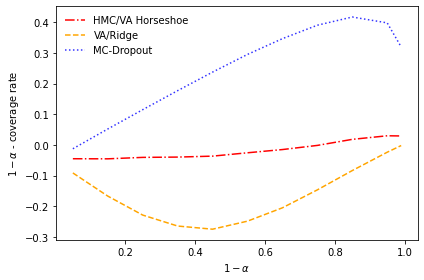

In [7]:
levels = np.append(np.linspace(0.05, 0.95, 10), float(0.99))
plt.plot(levels, levels - np.array(va_horse_ci['coverage_rate']), linestyle = '-.', label = 'HMC/VA Horseshoe', color = 'red')
#plt.plot(levels, levels - np.array(hmc_horse_ci['coverage_rate']), linestyle = 'dotted', label = 'HMC/Horseshoe', color = 'darkred')
plt.plot(levels, levels - np.array(va_ridge_ci['coverage_rate']), label = 'VA/Ridge', linestyle = 'dashed', color = 'orange')
#plt.plot(levels, levels - np.array(hmc_ridge_ci['coverage_rate']), label = 'HMC/VA Ridge', color = 'darkorange')
plt.plot(levels, levels - np.array(mc_ci['coverage_rate']), linestyle = ':', label = 'MC-Dropout', color = 'blue', alpha = 0.8)
plt.xlabel((r'$1- \alpha$'))
plt.ylabel(r'$1- \alpha$ - coverage rate')
plt.legend()
plt.legend(framealpha=0.0)
plt.tight_layout()
#plt.savefig('coverage_rate_cil.png', dpi = 300)
# coverage rate is actually higher than predicted coverage rate

## PI width

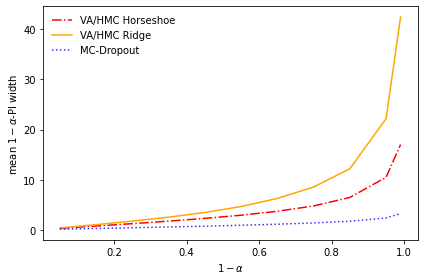

In [8]:
plt.plot(np.append(np.linspace(0.05, 0.95, 10), float(0.99)), np.mean(np.abs(np.array(va_horse_ci['pred_int_width'])), axis = 1), label = 'VA/HMC Horseshoe', color = 'red', linestyle = '-.')
#plt.plot(np.append(np.linspace(0.05, 0.95, 10), float(0.99)), np.mean(np.abs(np.array(hmc_horse_ci['pred_int_width'])), axis = 1), label = 'HMC/Horseshoe', linestyle = 'dotted',color = 'darkred')
plt.plot(np.append(np.linspace(0.05, 0.95, 10), float(0.99)), np.mean(np.abs(np.array(va_ridge_ci['pred_int_width'])), axis = 1), label = 'VA/HMC Ridge', color = 'orange')
plt.plot(np.append(np.linspace(0.05, 0.95, 10), float(0.99)), np.mean(np.abs(np.array(mc_ci['pred_int_width'])), axis = 1), label = 'MC-Dropout', linestyle = ':',  color = 'blue', alpha = 0.8)
#plt.plot(np.append(np.linspace(0.05, 0.95, 10), float(0.99)), np.mean(np.abs(np.array(hmc_ridge_ci['pred_int_width'])), axis = 1), label = 'HMC/Ridge', color = 'darkorange')
plt.xlabel((r'$1- \alpha$'))
plt.ylabel(r'mean $1 - \alpha$-PI width')
plt.legend()
plt.legend(framealpha=0.0)
plt.tight_layout()
#plt.savefig('mean_pi_width_cil.png', dpi = 300)